## LightGBM

LightGBM의 트리 분할 방식
- 일반적인 GBM 계열의 트리 분할 방식은 균형 트리 분할(Level Wise) 방식을 이용합니다. 이 방법을 이용하면 최대한 균형 잡힌 트리를 생성하면서도 트리의 깊이를 최소화 할 수 있다는 장점이 있습니다. 이러한 방식으로 트리를 생성할 경우 과적합 문제에 더 강한 구조를 갖게 되지만 균형을 맞추기 위한 시간이 필요하다는 단점이 있습니다.
- 반면 LightGBM의 경우 일반적인 균형 트리 분할 방식과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 이용합니다.
- 이 방법은 트리의 균형을 맞추지 않고 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리가 깊어지고 비대칭 적인 트리를 만듭니다. 하지만 이러한 방식으로 트리를 계속해서 분할하게 되면 결국 균형 트리 분할 방식보다 예측 오류 손실을 최소화 한다는 방법을 이용

LightGBM과 XGBoost를 비교시 장점

- 빠른 학습 및 예측 수행 시간
- 더 작은 메모리 사용량
- 카테코리형 피처의 자동 변환 및 최적 분할

LightGBM은 이러한 장점을 가지고 있지만 공식 문서에 따르면 일반적으로 10,000 건 이하의 데이터 세트를 다루는 경우 과적합 문제가 발생하기 쉽다는 단점이 있음

https://kimdingko-world.tistory.com/184


In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [2]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [3]:
get_clf_eval(y_test , preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

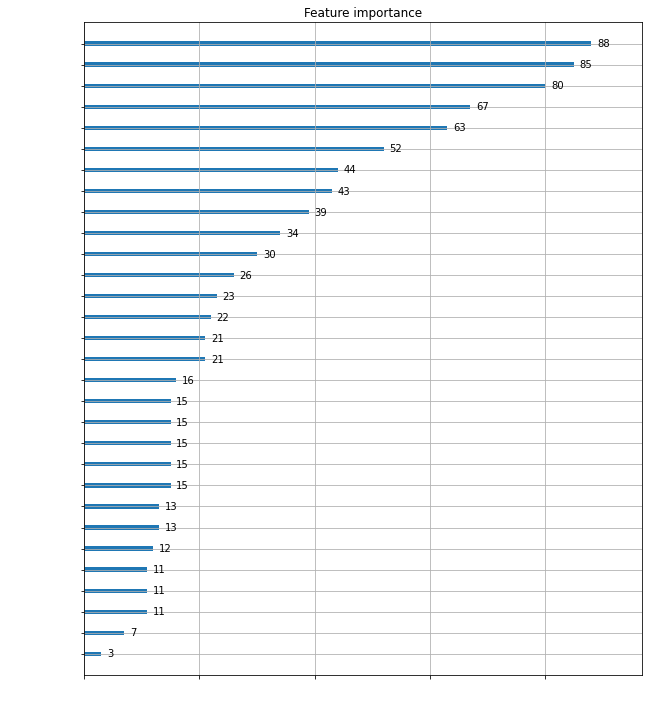

In [5]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
## 다크모드여서 흰색으로 표시
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
##

plot_importance(lgbm_wrapper, ax=ax)